# Problématique

* On considère la population mère avec *N* essaies, et *r* notes distinctes *C1, C2, ..., C6*

* On note *Ni* le nombre des essaies de la notes *Ci* et *pi=Ni/N* la proportion des essaies de la note *Ci* dans la population mère.

* On souhaite constituer un échantillon équilibré et représentatif de la population mère.

# Eléments de statistique

* Pour obtenir les bons niveaux de proportion dans un échantillon équilibré et représentatif, il faut que la taille de l'échantillon soit suffisante pour que les proportions obsérvées dans l'échantillon soient proches des proportions réelles dans la population mère.

* Plus la taille de l'échantillon est grande, plus les proportions observées sont susceptibles d'être proches des proportions réelles.

* Il existe une formule permettant de calculer la taille d'échantillon nécessaire pour obtenir une précision données : 

n = Z² . pi . (1-pi)/(E²)


où : 

  - n est la taille de l'échantillon

  - Z est le coefficient de confiance souhaité

  - pi est la proportion de la population mère de la note i

  - et E est l'erreur de marge souhaitée

In [2]:
import pandas as pd
import numpy as np
from skimpy import skim
import plotly.express as px

from typing import List

from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('../../train_cleaned.csv')

In [6]:
df_train, df_test = train_test_split(df, test_size=0.2, stratify=df['labels'], random_state=42)
df_train, df_val = train_test_split(df_train, test_size=0.2, stratify=df_train['labels'], random_state=42)

In [7]:
df = pd.concat([df_train, df_val])

In [8]:
df.head()

,text,labels,length,stemmed_text,simple_cleaned_text,corrected_text,n_errors,ratio_err
13042,In the story making mona lisa smile the author...,3,423,stori make mona lisa smile author talk interst...,the story making mona lisa smile the author ta...,the story making mona lisa smile the author ta...,16,0.037825
13674,The last ship to try to land on Venus was thre...,2,342,ship try land venu decad ago astronot scientis...,the last ship try land venus was three decades...,the last ship try land venus was three decades...,13,0.038012
2349,electrol college is not just a college it is a...,1,715,electrol colleg colleg process elector colleg ...,electrol college not just college process the ...,electrola college not just college process the...,20,0.027972
5257,"Many countries are pushing towards less cars, ...",5,608,countri push car ultimatelycr better world lim...,many countries are pushing towards less cars u...,many countries are pushing towards less cars m...,3,0.004934
1064,Do voters some times get confused about the el...,2,277,voter time confus elect vote wrong candid sing...,voters some times get confused about the elect...,voters some times get confused about the lecte...,8,0.028881


In [9]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 13845  │ │ string      │ 4     │                                                          │
│ │ Number of columns │ 8      │ │ int64       │ 3     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name     ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0    ┃ p25      ┃ p50     ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ labels          │   0 │      0 │     2.9 │       1 │     1 │        2 │       3 │      4 │     6 │  ▂▆▇▅▁  │  │
│ │ length          │   0 │      0 │     410 │     170 │   150 │      280 │     380 │    500 │  1700 │   ▇▅▁   │  │
│ │ n_errors        │   0 │      0 │     5.3 │     4.8 │     0 │        2 │       4 │      7 │    68 │   ▇▁    │  │
│ │ ratio_err       │   0 │      0 │   0.014 │   0.013 │     0 │   0.0053 │   0.011 │  0.019 │  0.15 │   ▇▁    │  │
│ └─────────────────┴─────┴────────┴─────────┴─────────┴───────┴──────────┴─────────┴────────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                          ┃ NA    ┃ NA %      ┃ words per row            ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ text                                 │     0 │         0 │                      380 │              5314822 │  │
│ │ stemmed_text                         │     0 │         0 │                      160 │              2149305 │  │
│ │ simple_cleaned_text                  │     0 │         0 │                      290 │              4019571 │  │
│ │ corrected_text                       │     0 │         0 │                      290 │              4021328 │  │
│ └──────────────────────────────────────┴───────┴───────────┴──────────────────────────┴──────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [10]:
N = df.shape[0]
print(f'le jeu de données contient {N} points')
r = df['labels'].nunique()
print(f'le jeu de données contient {r} classes :')
Ni = {i: df[df['labels']==i].shape[0] for i in range(1,r+1)}
pi = {i+1: Ni[i+1]/N for i in range(r)}
for i in range(r):
    print(f'\tla classe {i+1} contient {Ni[i+1]} points, soit {pi[i+1]*100:.2f}% des points')

le jeu de données contient 13845 points
le jeu de données contient 6 classes :
	la classe 1 contient 1001 points, soit 7.23% des points
	la classe 2 contient 3778 points, soit 27.29% des points
	la classe 3 contient 5024 points, soit 36.29% des points
	la classe 4 contient 3141 points, soit 22.69% des points
	la classe 5 contient 776 points, soit 5.60% des points
	la classe 6 contient 125 points, soit 0.90% des points


In [11]:
Ni

{1: 1001, 2: 3778, 3: 5024, 4: 3141, 5: 776, 6: 125}

In [12]:
pi

{1: 0.07230046948356808,
 2: 0.27287829541350667,
 3: 0.36287468400144457,
 4: 0.2268689057421452,
 5: 0.056049115204044785,
 6: 0.00902853015529072}

In [13]:
fig = px.histogram(df, x='labels', title='Distribution of labels', nbins=20, width=800, height=400, text_auto=True)
fig.show()

## Exploration 

* Dans un premier lieu, on souhaite obtenir une précision de 0.05 (soit une erreur de marge de 5%) avec une confiance de 95%.

* On veut déterminer les tailles d'échantillons correspondantes pour chaque note *n1, n2, ..., n6* 

In [14]:
def get_n(z: float, p: float, e: float) -> int:
    """
    Method to compute the sample size for a given confidence level, proportion and margin error for a population
    :param z: z-score corresponding to the confidence level (e.g. 1.96 for 95%)
    :param p: proportion of the population of the class of interest
    :param e: margin error
    :return: sample size
    """

    return int((z**2 * p * (1 - p)) / (e**2))

In [15]:
confidence_level = 0.95
margin_error = 0.05
z = 1.96

In [16]:
sample_size = {k: get_n(z=z, p=v, e=margin_error) for k, v in pi.items()}

In [17]:
sample_size

{1: 103, 2: 304, 3: 355, 4: 269, 5: 81, 6: 13}

* On peut déterminer la taille d'échantillon minimale en prenant le maximum de chaque sous-echantillon pour obtenir une précision de 5% pour chacune des 6 proportions

In [18]:
min_sample_size = max(sample_size.values())
print(f"Taille de l'échantillon pour la population: {min_sample_size}")

Taille de l'échantillon pour la population: 355


## Analyse de Sensibilité sur l'erreur de marge

In [19]:
margin_errors = [0.001, 0.01, 0.05, 0.1]

sample_sizes = {e: {k: get_n(z=z, p=v, e=e) for k, v in pi.items()} for e in margin_errors}

In [20]:
sample_sizes

{0.001: {1: 257668, 2: 762233, 3: 888165, 4: 673814, 5: 203249, 6: 34370},
 0.01: {1: 2576, 2: 7622, 3: 8881, 4: 6738, 5: 2032, 6: 343},
 0.05: {1: 103, 2: 304, 3: 355, 4: 269, 5: 81, 6: 13},
 0.1: {1: 25, 2: 76, 3: 88, 4: 67, 5: 20, 6: 3}}

In [21]:
fig = px.bar(x=margin_errors, y=[max(v.values()) for v in sample_sizes.values()], labels={"x": "margin error", "y": "sample size"}, text_auto=True)
fig.add_scatter(x=margin_errors, y=[max(v.values()) for v in sample_sizes.values()], mode="lines")
fig.show()

* On peut voir qu'à partir de 8881 lignes, on aura un échantillon de données qui représente notre échantillon de base

* On ignore la marge d'erreur de 0.001 car 888.148 données est trop volumineux. ON va voir par la suite le nombre optimale de données à prendre

# Idée

* Pour établir formellement un seuil d'undersampling, une approche pertinente est d'utiliser **l'Inégalité de Hoeffding** ou **l'Inégalité de Chernoff**.

* Ces méthodes permettent de quantifier la déviation d'une somme de variables aléatoires (les lables) par rapport à la moyenne attendue avec une probabilité bien définie.

# Inégalité de Hoeffding

L'inégalité de Hoeffding peut être utilisée pour estimer le nombre minimal d'échantillons ni dans chaque classe *i* pour garantir que la fréquence observée *p'i* de la classe *i* dans l'échantillon reste proche de la fréquence réelle *pi* avec un niveau de confiance donnée


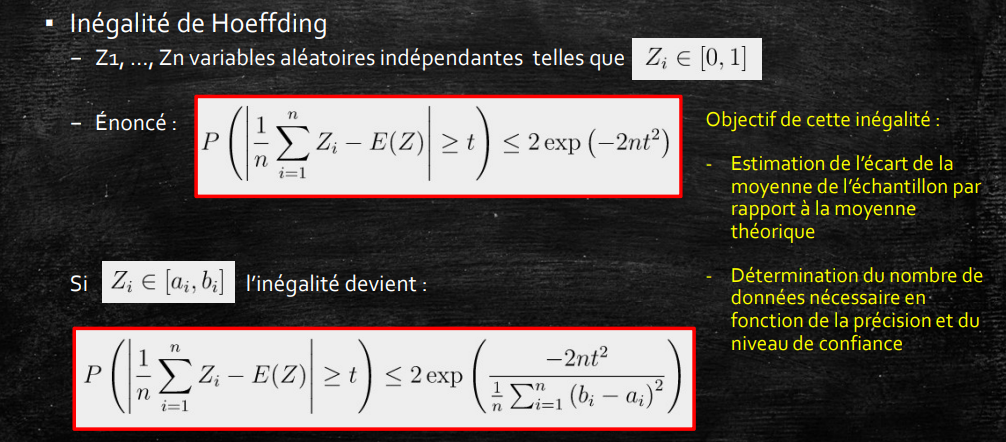

Pour fixer un niveau de confiance *alpha* (par exemple 95% ou 99%) et une marge d'erreur *t*, pour *ni* : 

2.exp.(-2.ni.t²) = alpha 

ni = log(2/alpha)/(2.t²)

In [22]:
def get_hoeffding(alpha: float, epsilon: float) -> float:
    """
    Calculate the Hoeffding's sample size for a given confidence level (alpha) and error tolerance (epsilon).

    Args:
        alpha (float): Confidence level (between 0 and 1).
        epsilon (float): Error tolerance (positive value).

    Returns:
        float: Hoeffding's sample size.

    Raises:
        ValueError: If alpha is not between 0 and 1, or epsilon is not a positive value.
    """
    if not 0 < alpha < 1:
        raise ValueError("alpha must be between 0 and 1")
    if epsilon <= 0:
        raise ValueError("epsilon must be a positive value")

    return np.log(2 / alpha) / (2.0 * (epsilon ** 2))


In [24]:
errors: List[float] = np.linspace(start=0.01, stop=0.1, num=10)
tol_err: List[float] = np.linspace(start=0.01, stop=0.1, num=10)
list_ni = np.zeros((10, 10))
for i, alpha in enumerate(tol_err):
    for j, epsilon in enumerate(errors):
        ni = get_hoeffding(alpha, epsilon)
        list_ni[i,j] = ni
        # print(f"precision: {1 - alpha}, error: {epsilon}, ni: {ni}")

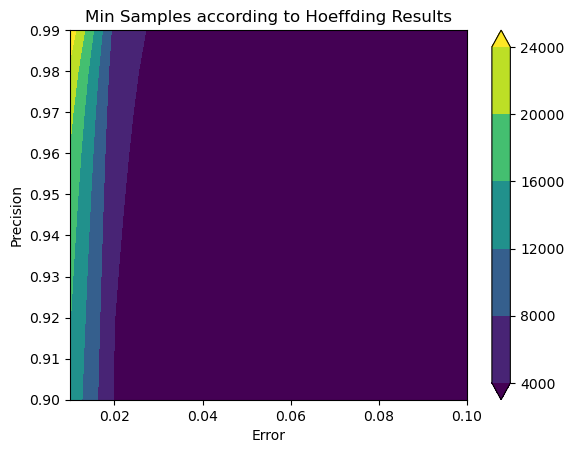

In [25]:
import matplotlib.pyplot as plt
x, y  = errors.flatten(), tol_err.flatten()
y = 1 - y

z = list_ni
   
cs = plt.contourf(x, y, z,
                  extend ='both', 
                  alpha = 1) 
  
plt.colorbar(cs) 
  
plt.title('Min Samples according to Hoeffding Results') 
plt.xlabel('Error')
plt.ylabel('Precision')
plt.show() 

In [26]:
fig = px.imshow(list_ni, x=errors, y=1- tol_err, labels={"x": "error", "y": "precision"}, text_auto=True, title="Hoeffding's sample size")
fig.show(width=150, height=150)

In [27]:
thresholds = [18500, 19600, 21000, 23100, 26500]

In [28]:
print(f"Number needed per class: {int(np.ceil(26500/6))} (for a precision of 0.99 and an error of 0.01)")

Number needed per class: 4417 (for a precision of 0.99 and an error of 0.01)


# Discussion

* Selon l'analyse statistique, le nombre d'echantillon à prendre est entre 8881 et 888148 afin respecter les répartition de chaque classe i 

* Selon l'Inégalité de Hoeffding, le nombre d'echnatillon optimal à prendre est : 26492.

* 26492 étant entre 8881 et 888148, respecte les conditions de répartition.

* **Pour avoir des classes équilibrées, on divise 26492 sur le nombre de classe (6) est on obient notre seuil d'undersampling**

In [29]:
colors = ['red', 'green', 'yellow', 'blue', 'black']

In [30]:
fig = px.histogram(df, x='labels', title='Distribution of labels Vs Thrushold', nbins=20, width=800, height=400, text_auto=True)
for i,t in enumerate(thresholds):
    fig.add_shape(type="line", x0=0, y0=t/6, x1=7, y1=t/6, line=dict(color=colors[i], width=1))
fig.show()

In [31]:
thresholds = [np.ceil(t/6) for t in thresholds]

In [32]:
deltas = {}
for i in range(1, 7):
    size = df[df['labels']== i].shape[0]
    delta = [t-size for t in thresholds]
    deltas[i] = delta
    

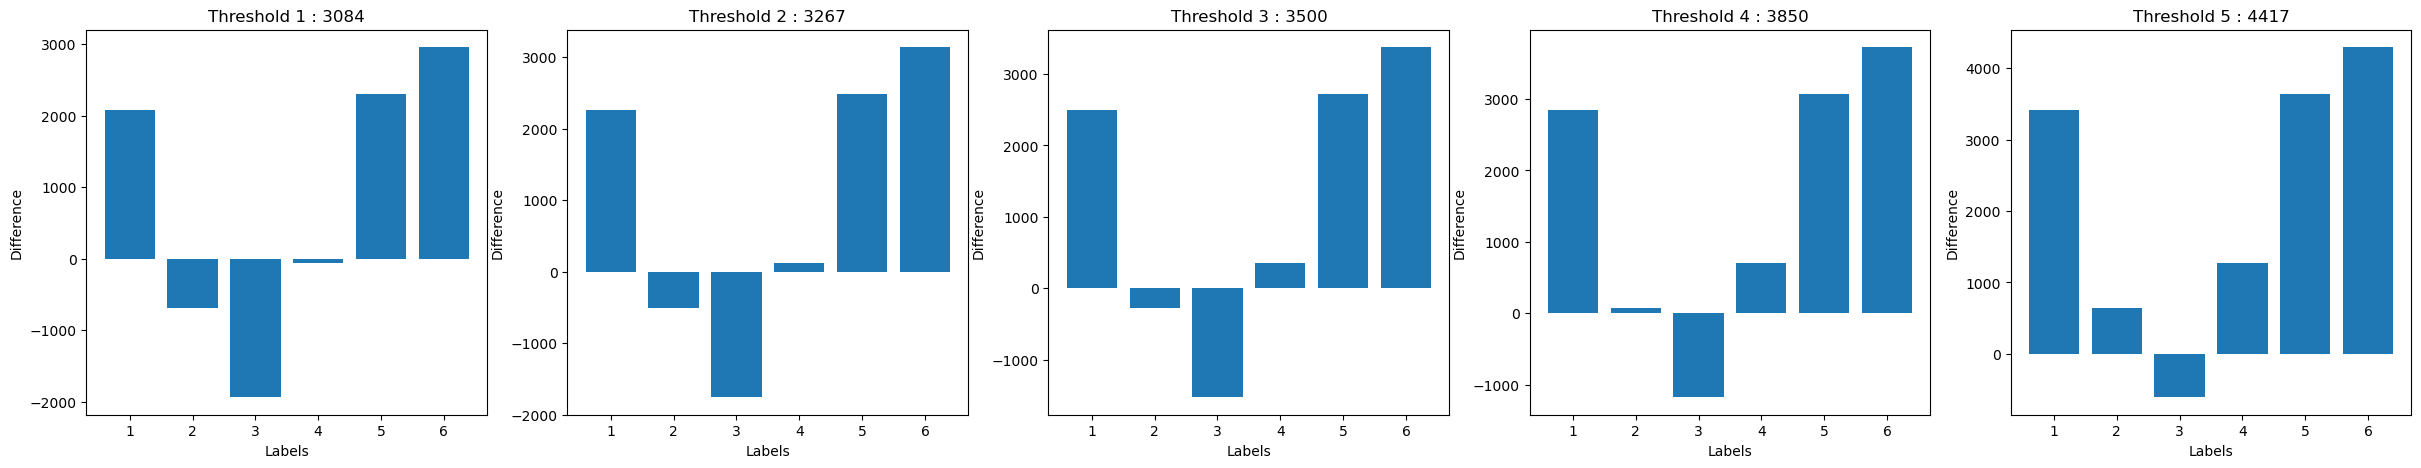

In [33]:
fig, ax = plt.subplots(1,5, figsize=(30, 5))

for i in range(5):
    ax[i].bar(deltas.keys(), [deltas[k][i] for k in deltas.keys()])
    ax[i].set_title(f"Threshold {i+1} : {int(thresholds[i])}")
    ax[i].set_xlabel('Labels')
    ax[i].set_ylabel('Difference')
    
plt.show()    

In [34]:
fig = px.histogram(df, x='labels', title='Distribution of labels Vs Thrushold', nbins=20, width=800, height=400, text_auto=True)

fig.add_shape(type="line", x0=0, y0=thresholds[0], x1=7, y1=thresholds[0], line=dict(color='red', width=1))
fig.show()

In [35]:
classes_undersampling = [2,3,4]
classes_oversampling = [i for i in range(1, 7) if i not in classes_undersampling]

print(f"Classes to undersample: {classes_undersampling}")
print(f"Classes to oversample: {classes_oversampling}")

Classes to undersample: [2, 3, 4]
Classes to oversample: [1, 5, 6]


# Undersampling

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Optional

In [37]:
df.head()

,text,labels,length,stemmed_text,simple_cleaned_text,corrected_text,n_errors,ratio_err
13042,In the story making mona lisa smile the author...,3,423,stori make mona lisa smile author talk interst...,the story making mona lisa smile the author ta...,the story making mona lisa smile the author ta...,16,0.037825
13674,The last ship to try to land on Venus was thre...,2,342,ship try land venu decad ago astronot scientis...,the last ship try land venus was three decades...,the last ship try land venus was three decades...,13,0.038012
2349,electrol college is not just a college it is a...,1,715,electrol colleg colleg process elector colleg ...,electrol college not just college process the ...,electrola college not just college process the...,20,0.027972
5257,"Many countries are pushing towards less cars, ...",5,608,countri push car ultimatelycr better world lim...,many countries are pushing towards less cars u...,many countries are pushing towards less cars m...,3,0.004934
1064,Do voters some times get confused about the el...,2,277,voter time confus elect vote wrong candid sing...,voters some times get confused about the elect...,voters some times get confused about the lecte...,8,0.028881


In [38]:
def plot_violins(df: pd.DataFrame, 
                 x: str, 
                 y: str,
                 output_path: Optional[str] = None) -> None:
    """
    Plot violin plots

    Args:
        df {pd.DataFrame} -- the dataframe
        x {str} -- the x-axis
        y {str} -- the y-axis
        output_path {Optional[str]} -- the output path
    """
    
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=x, y=y, data=df)
    plt.title(f'{y} vs {x}')
    if output_path:
        plt.savefig(output_path)
    plt.show()

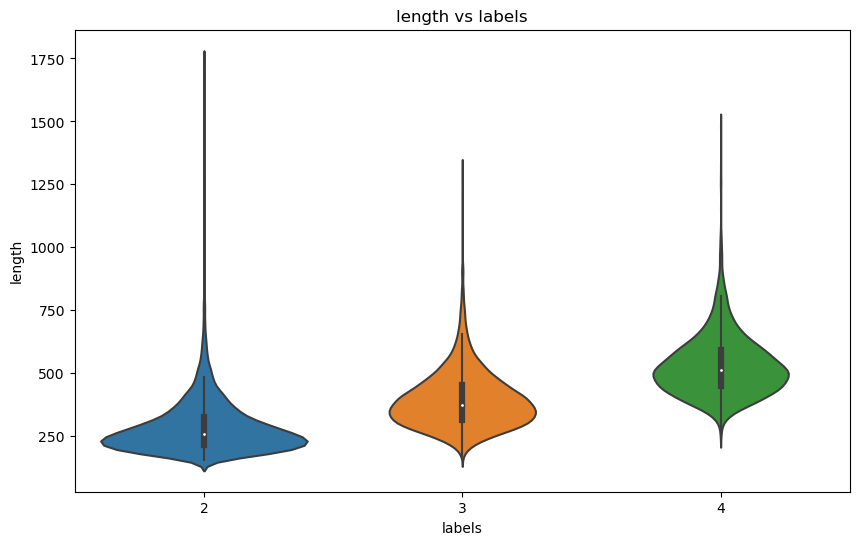

In [39]:
plot_violins(df[df['labels'].isin(classes_undersampling)], 'labels', 'length')

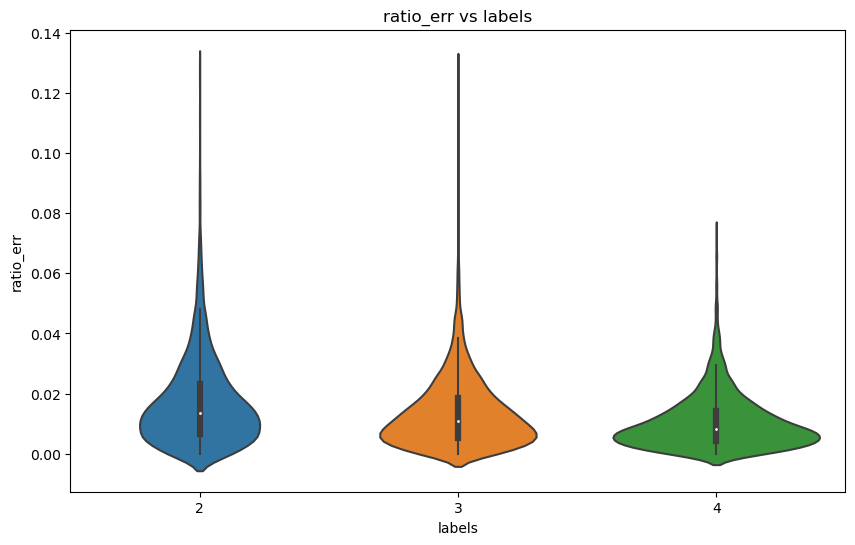

In [40]:
plot_violins(df[df['labels'].isin(classes_undersampling)], 'labels', 'ratio_err')

**Dans notre sous-echantillonnage, on veut garder les mêmes caractéristiques pour les deux classes**

In [41]:
from imblearn.under_sampling import RandomUnderSampler

In [42]:
data_class_2_3_4 = df[df['labels'].isin(classes_undersampling)]

In [43]:
dict_under = {i: int(thresholds[0]) for i in classes_undersampling}

In [44]:
dict_under

{2: 3084, 3: 3084, 4: 3084}

In [45]:
under_sampler = RandomUnderSampler(sampling_strategy=dict_under, random_state=42)

In [46]:
X_undersampled, y_undersampled = under_sampler.fit_resample(data_class_2_3_4.drop('labels', axis=1), data_class_2_3_4['labels'])

In [47]:
X_undersampled['labels'] = y_undersampled

In [48]:
X_undersampled

,text,length,stemmed_text,simple_cleaned_text,corrected_text,n_errors,ratio_err,labels
834,Some people think that the face on mars was cr...,174,peopl think face mar creat alien essai tell fa...,some people think that the face mars was creat...,some people think that the face mars was creat...,0,0.000000,2
3118,The article is called The challenge of Explori...,316,articl call challeng explor venu author make e...,the article called the challenge exploring ven...,the article called the challenge exploring ven...,2,0.006329,2
9452,The electoral college is a process that has be...,276,elector colleg process presid elect question r...,the electoral college process that has been us...,the electoral college process that has been us...,3,0.010870,2
4089,Google is trying to make things easy by creati...,276,googl try thing easi creat driveless car new c...,google trying make things easy creating drivel...,google trying make things easy creating driver...,7,0.025362,2
1575,"Dear State Senator,\r\n\r\nI am writing to you...",262,dear state senat write tell chang popular vote...,dear state senator writing you tell you that s...,dear state senator writing you tell you that s...,1,0.003817,2
...,...,...,...,...,...,...,...,...
10298,People all over the world like to try new thin...,660,peopl world like try new thing everydai face n...,people all over the world like try new things ...,people all over the world like try new things ...,1,0.001515,4
6215,Autonomous cares have been dreamt of for sever...,341,autonom care dreamt gener theyv gone multipl c...,autonomous cares have been dreamt for several ...,autonomous cares have been dreamt for several ...,7,0.020528,4
6116,As time goes on technology improves day by day...,498,time goe technolog improv dai dai live world t...,time goes technology improves day day live wor...,time goes technology improves day day live wor...,9,0.018072,4
1033,The author does not support his idea well beca...,464,author support idea littl evid claim claim ven...,the author does not support his idea well beca...,the author does not support his idea well beca...,2,0.004310,4


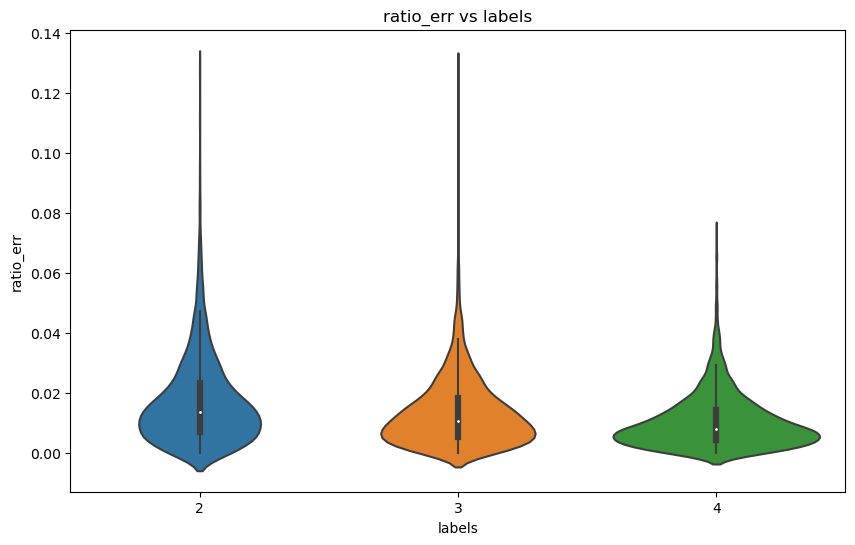

In [49]:
plot_violins(X_undersampled, 'labels', 'ratio_err')

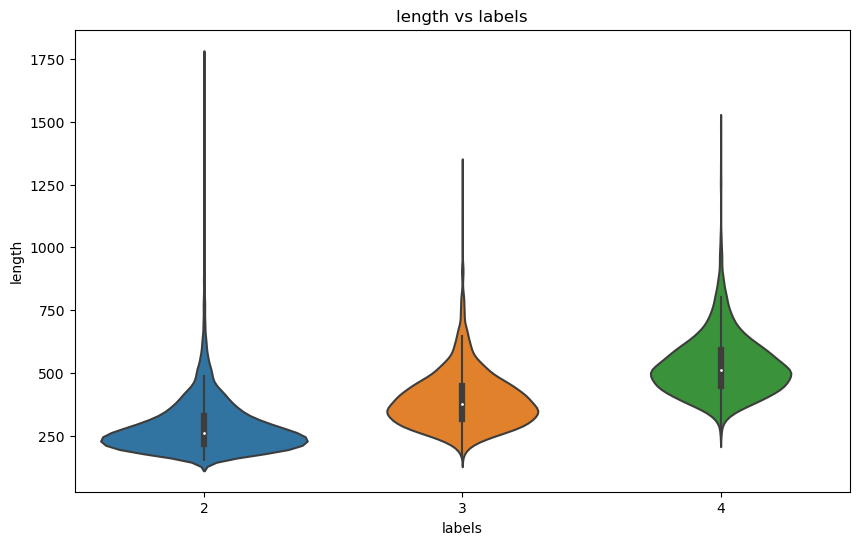

In [50]:
plot_violins(X_undersampled, 'labels', 'length')

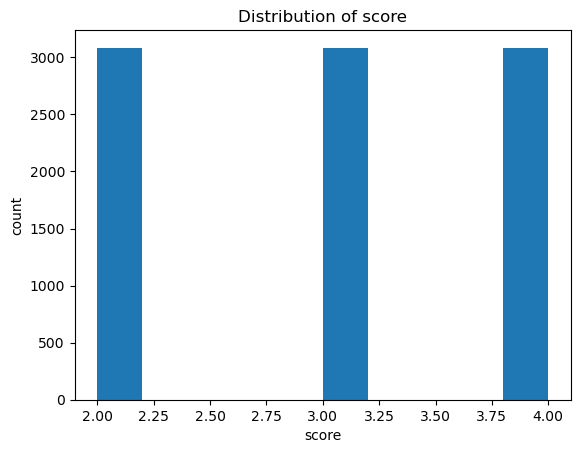

In [51]:
plt.hist(X_undersampled['labels'])
plt.xlabel('score')
plt.ylabel('count')
plt.title('Distribution of score')
plt.show()

In [52]:
final_df = pd.concat([df[df['labels'].isin(classes_oversampling)], X_undersampled])

In [53]:
final_df.head()

,text,labels,length,stemmed_text,simple_cleaned_text,corrected_text,n_errors,ratio_err
2349,electrol college is not just a college it is a...,1,715,electrol colleg colleg process elector colleg ...,electrol college not just college process the ...,electrola college not just college process the...,20,0.027972
5257,"Many countries are pushing towards less cars, ...",5,608,countri push car ultimatelycr better world lim...,many countries are pushing towards less cars u...,many countries are pushing towards less cars m...,3,0.004934
2992,keeping the\r\n\r\nElectoral College would be ...,1,425,keep elector colleg best choic select elector ...,keeping the electoral college would the best c...,keeping the electoral college would the best c...,9,0.021176
6224,"Authors that present a well-developed, convinc...",5,667,author present develop convinc argument larg i...,authors that present well developed convincing...,authors that present well developed convincing...,10,0.014993
10327,"When I was reading this article, it brought to...",1,273,read articl brought attent venu worthi pursuit...,when was reading this article brought attentio...,when was reading this article brought attentio...,1,0.003663


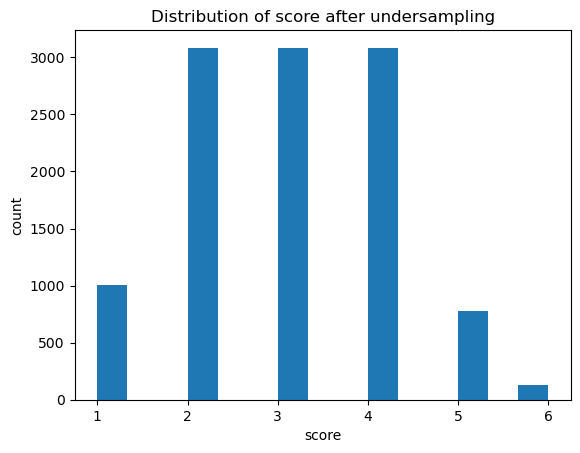

In [54]:
plt.hist(final_df['labels'], bins=15)
plt.xlabel('score')
plt.ylabel('count')

plt.title('Distribution of score after undersampling')
plt.show()

In [156]:
final_df = final_df[['corrected_text', 'length', 'ratio_err', 'labels']]

In [157]:
df_train, df_val = train_test_split(final_df, test_size=0.2, stratify=final_df['labels'], random_state=42)

In [163]:
df_train.to_csv('./../../data/train_under.csv', index=False)
df_val.to_csv('./../../data/val_under.csv', index=False)